In [2]:
import numpy as np
import pandas as pd
import scipy
import evaluation

## Determining positions using predicted prices and asset price covariance estimations

Assume there exists $k$ assets. We want to choose our positions $w = (w_1, w_2, ..., w_k)$ such that the Sharpe ratio is minimized in each time step, given a predicted price tomorrow and a predicted asset price covariance matrix for tomorrow. Thus, we seek to solve

$w_t = \mathrm{argmin}_{w \in \mathbb{R}^k} \frac{r_{t,6}^\top w}{\sqrt{w^\top \hat{\Sigma}_{t} w}}$.

where $r_{t,6}$ is the predicted 6-day return at day $t$, and $\hat{\Sigma}_{t}$ the predicted covariance matrix at time $t$ with linear shrinkage.

In [56]:
def neg_predicted_sharpe_ratio_tomorrow(    
    positions: np.array,  # variables to optimize
    prices_next: np.array, 
    prices_yesterday: np.array, 
    cov_matrix: np.array,
) -> float:
    if not (len(positions) == len(prices_next) == len(prices_yesterday)):
        raise ValueError(f'lengths not the same: {len(positions)} {len(prices_next)} {len(prices_yesterday)}')
        
    ret = (prices_next - prices_yesterday).dot(positions)
    portfolio_std = np.sqrt(positions.T @ cov_matrix @ positions)
    
    return - ret / portfolio_std

In [40]:
cov_matrix = np.identity(2)

In [20]:
weights = np.array([2, 3])

In [24]:
assert weights.T @ cov_matrix @ weights == (5 * 2**2) + (5 * 3**2)

In [37]:
prices_next = np.array([5.0, 5.0])

In [38]:
prices_yesterday = np.array([3.0, 2.0])

In [29]:
returns = prices_next - prices_yesterday
returns

array([2, 3])

In [30]:
returns.dot(weights)

13

In [58]:
#x0 = np.array([1.0, 1.0])
x0 = np.random.rand(2)

position = scipy.optimize.minimize(
    neg_predicted_sharpe_ratio_tomorrow, 
    x0=x0,
    args=(prices_next, prices_yesterday, cov_matrix),
    #bounds=[(-1, 1), (-1, 1)],
)

In [60]:
type(position)

scipy.optimize._optimize.OptimizeResult

In [61]:
position.x

array([0.37039525, 0.55559029])

In [6]:
# 2 assets, portfolio weights w1, w2 
weights = np.array([1, 1])
prices_next = np.array([5, 5])
prices_yesterday = np.array([3, 3])
cov_matrix = np.array([[], []])

assert 4 == sharpe_ratio(weights, prices_next, prices_yesterday, None)

In [ ]:
scipy.optimize.minimize(
    inferred_neg_sharpe_ratio_tomorrow, 
    args=(
        prices_next, 
        prices_yesterday, 
        cov_matrix,
    ),
    constraints=[
        w1,
        w2,
    ],
)

### Plotting


In [1]:
import pandas as pd
import evaluation
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv('../data/hackathon_prices_all.csv', index_col='dates', parse_dates=['dates'])

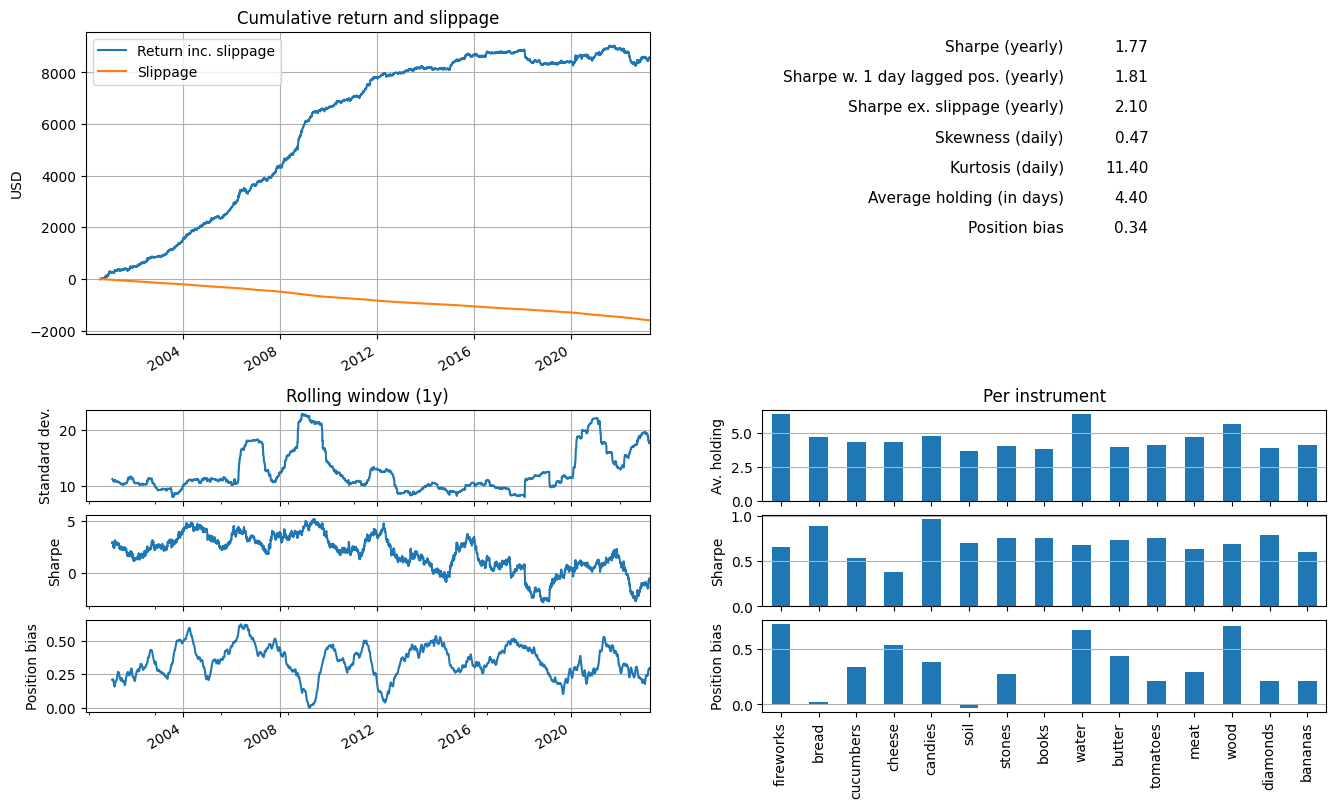

In [30]:
# WHAT WE HANDED IN 
experiment_name = '1749-eval-linear_return_independent_assets_lynx-no_op-no_op'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

<Axes: xlabel='dates'>

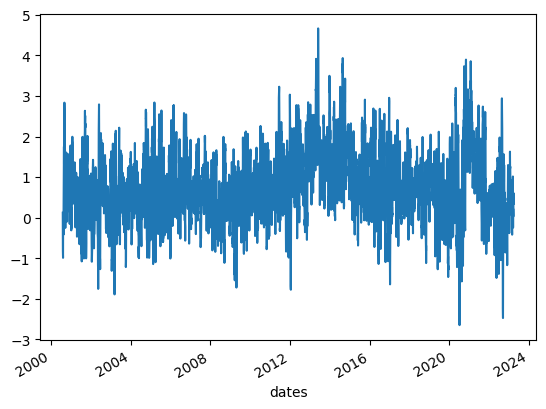

In [31]:
position['fireworks'].plot()

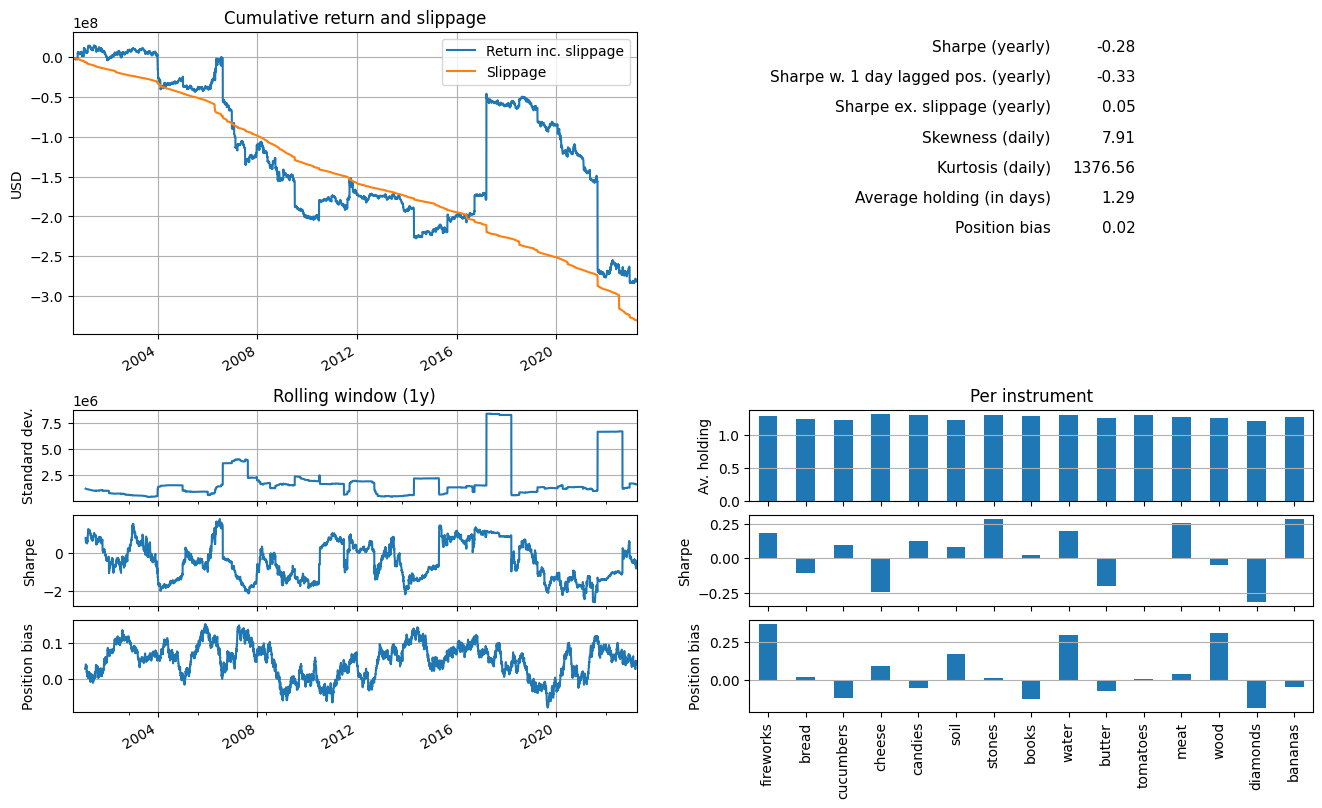

In [18]:
# Pure Linear return predictor + sharpe optimizer every day
experiment_name = '1757-eval-linear_return_predictor-naive-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

<Axes: xlabel='dates'>

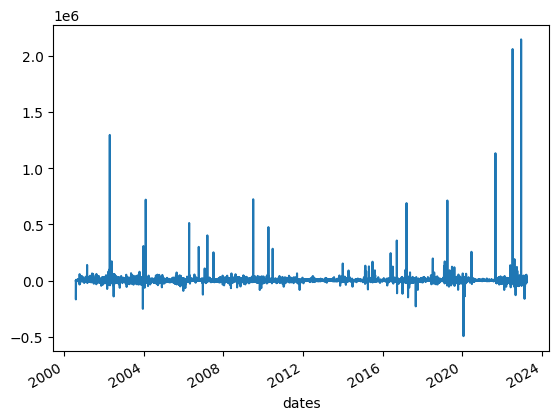

In [19]:
position['fireworks'].plot()

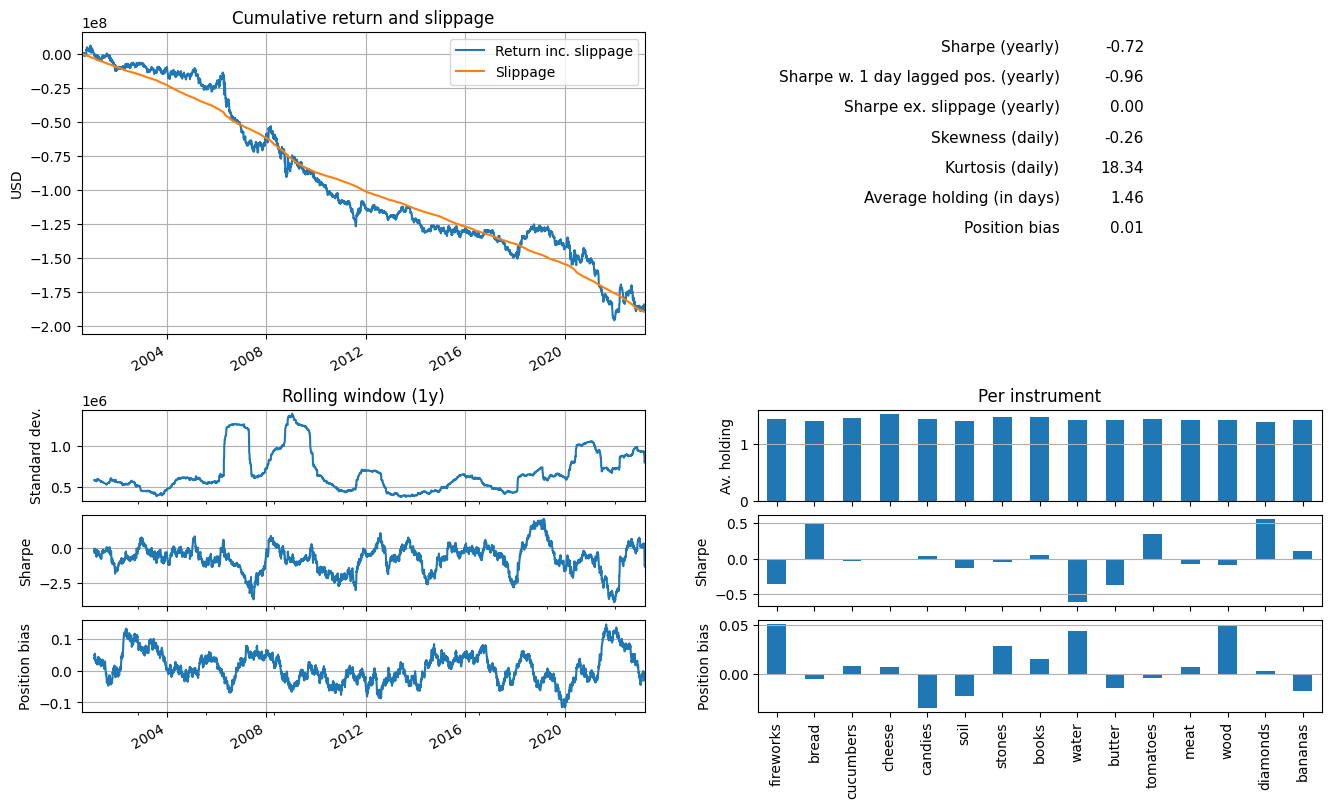

In [20]:
# Pure Linear return predictor + sharpe optimizer every day; 
# with slippage * 100 to penalize large fast position changes 
experiment_name = '1805-eval-linear_return_predictor-naive-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

<Axes: xlabel='dates'>

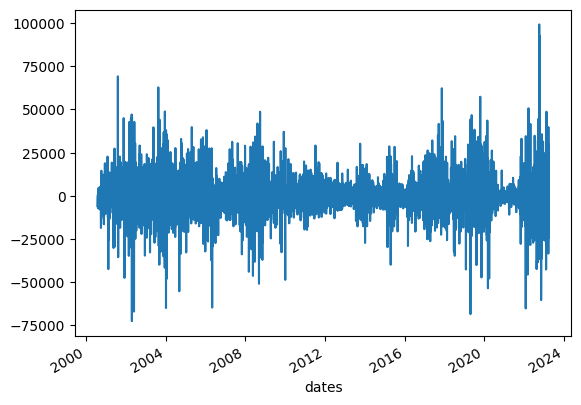

In [21]:
position['fireworks'].plot()

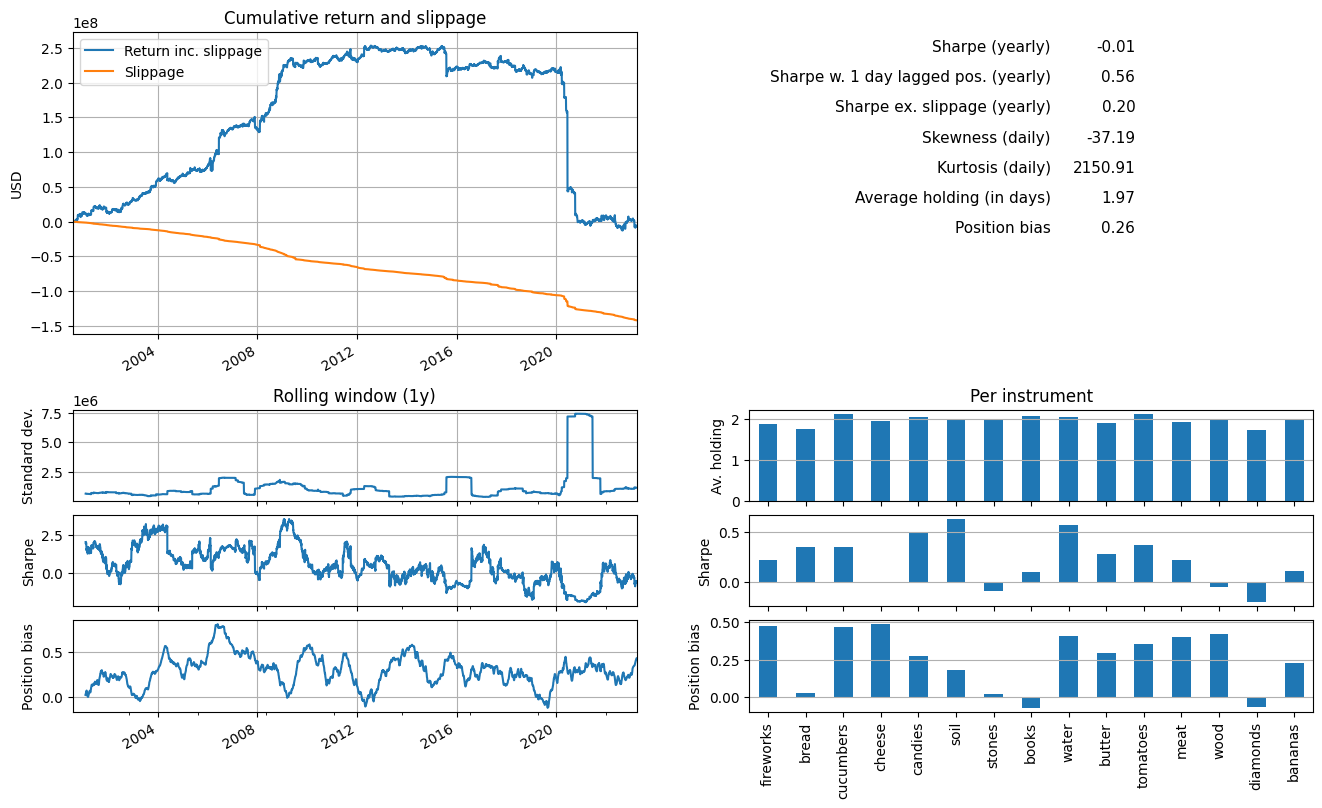

In [24]:
# Pure Linear return predictor + sharpe optimizer every day; 
# with init at prev position
experiment_name = '1811-eval-linear_return_predictor-naive-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

<Axes: xlabel='dates'>

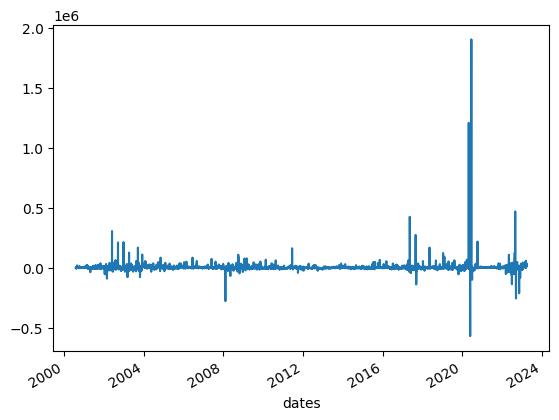

In [25]:
position['fireworks'].plot()

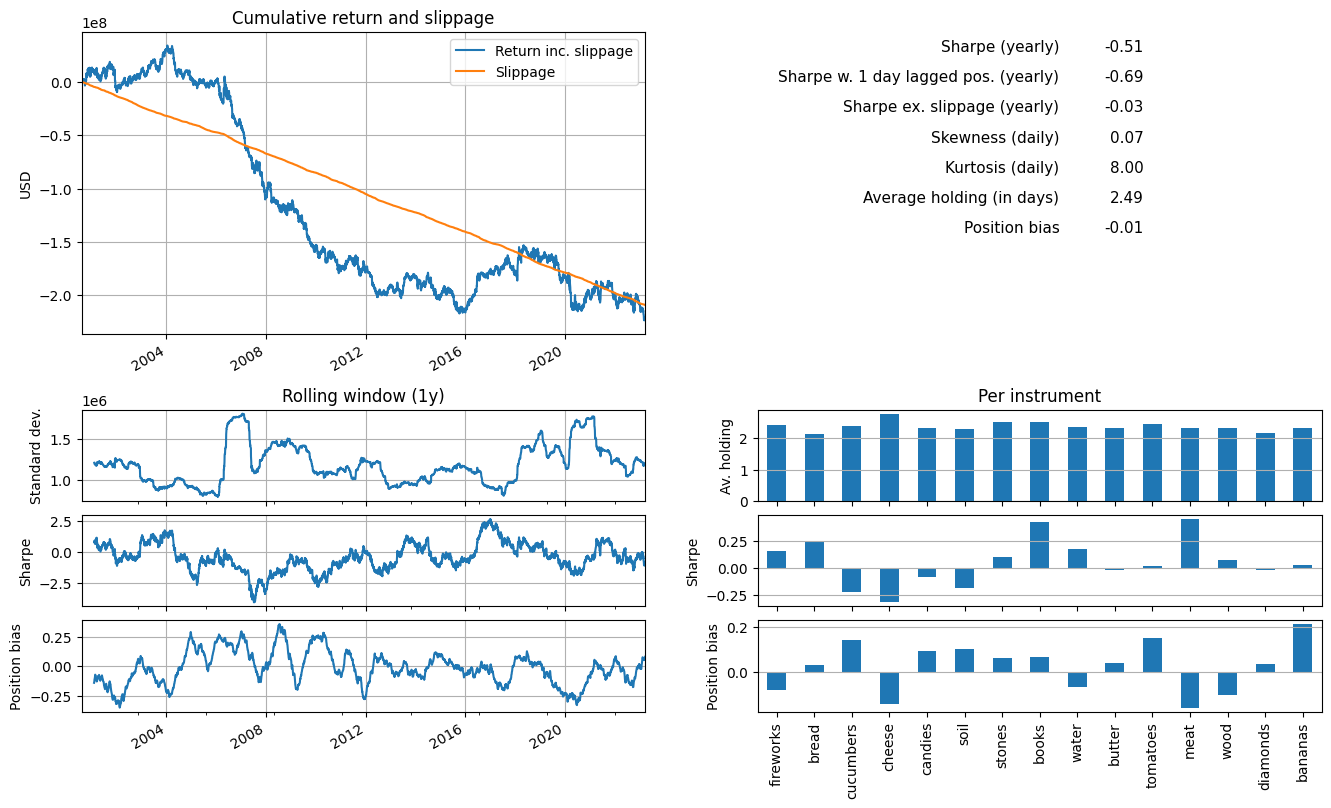

In [26]:
# Pure Linear return predictor + sharpe optimizer every day; 
# with init at prev position + 1000 * slippage
experiment_name = '1816-eval-linear_return_predictor-naive-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

<Axes: xlabel='dates'>

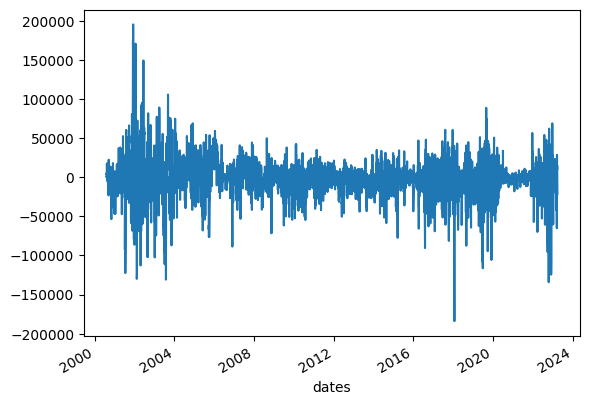

In [27]:
position['fireworks'].plot()

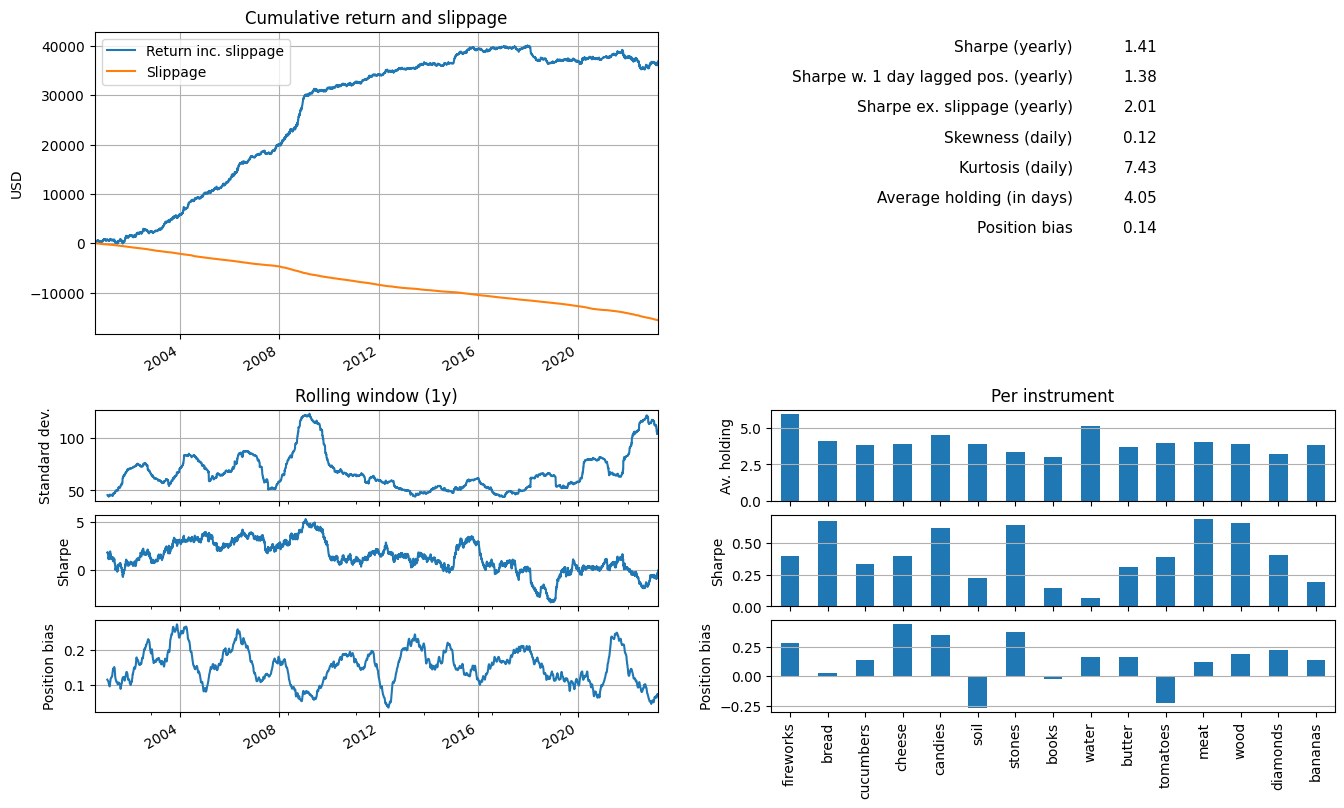

In [28]:
# Pure Linear return predictor + sharpe optimizer every day; 
# with init at prev position + squared slippage
experiment_name = '1833-eval-linear_return_predictor-naive-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

<Axes: xlabel='dates'>

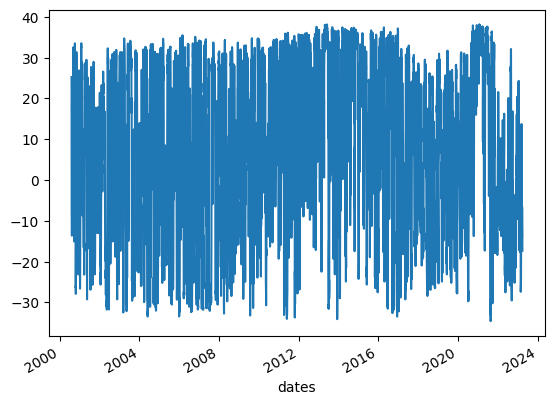

In [29]:
position['fireworks'].plot()

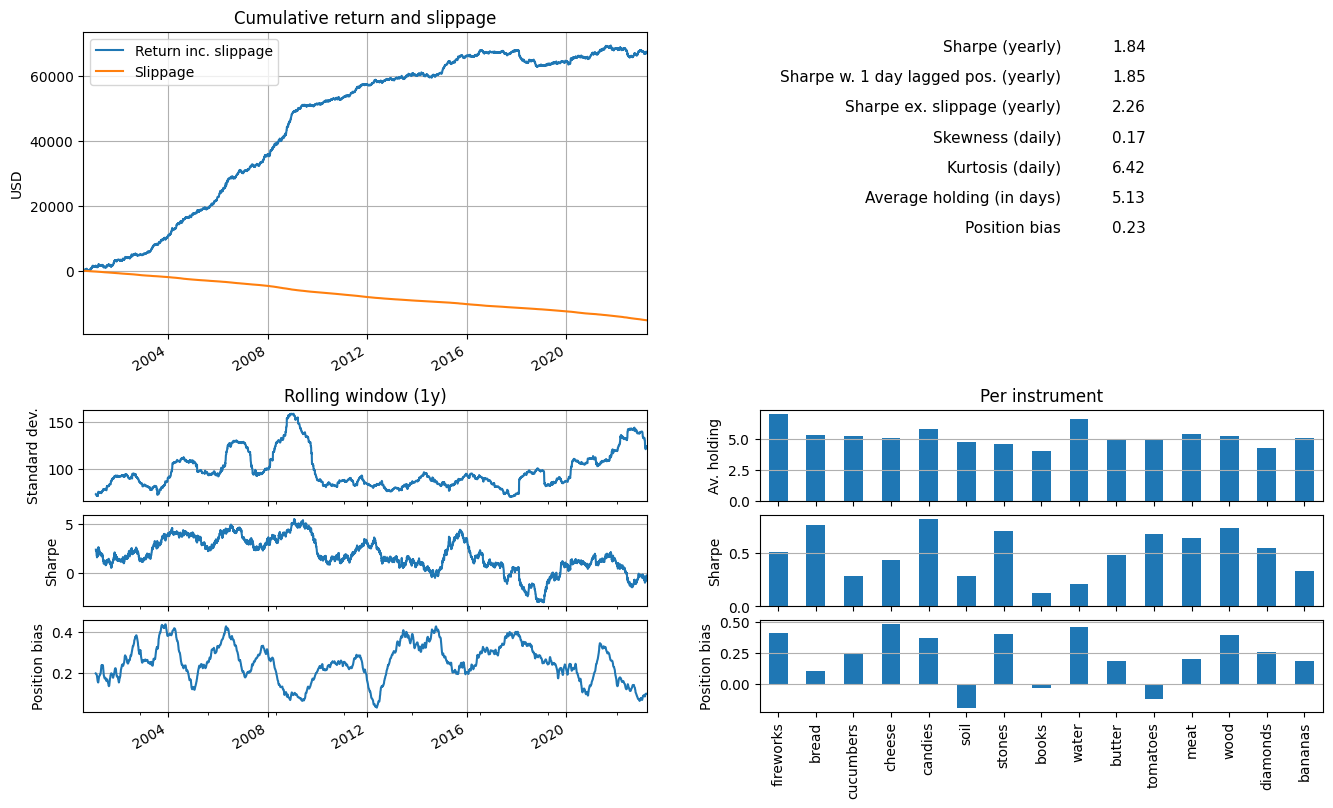

In [49]:
# Pure Linear return predictor + sharpe optimizer every day; 
# with init at prev position + squared slippage*10 + don't update every 3rd day 

# cov_window_size=125; hist_window=150; future_window=10; vol_window=100; eval=True
experiment_name = '1906-eval-linear_return_predictor-naive-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

<Axes: xlabel='dates'>

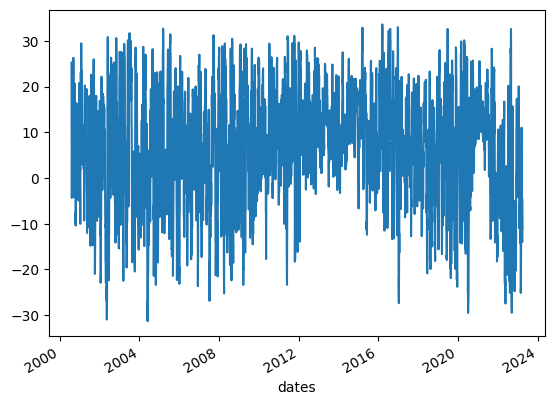

In [50]:
position['fireworks'].plot()

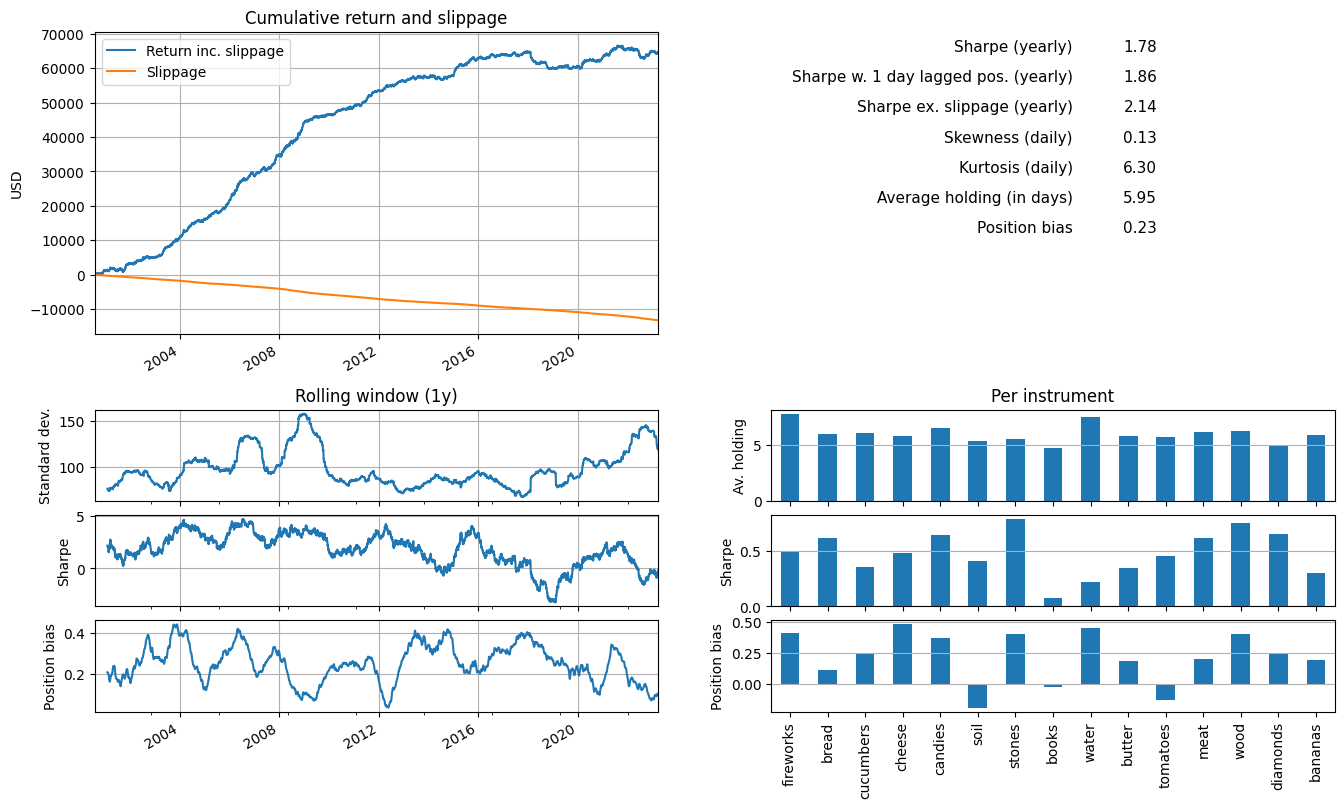

In [53]:
# Pure Linear return predictor + normal cov + sharpe optimizer every day; 
# with init at prev position + squared slippage*10 + only update every 2nd day 

# cov_window_size=125; hist_window=150; future_window=10; vol_window=100; eval=True
experiment_name = '1916-eval-linear_return_predictor-naive-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

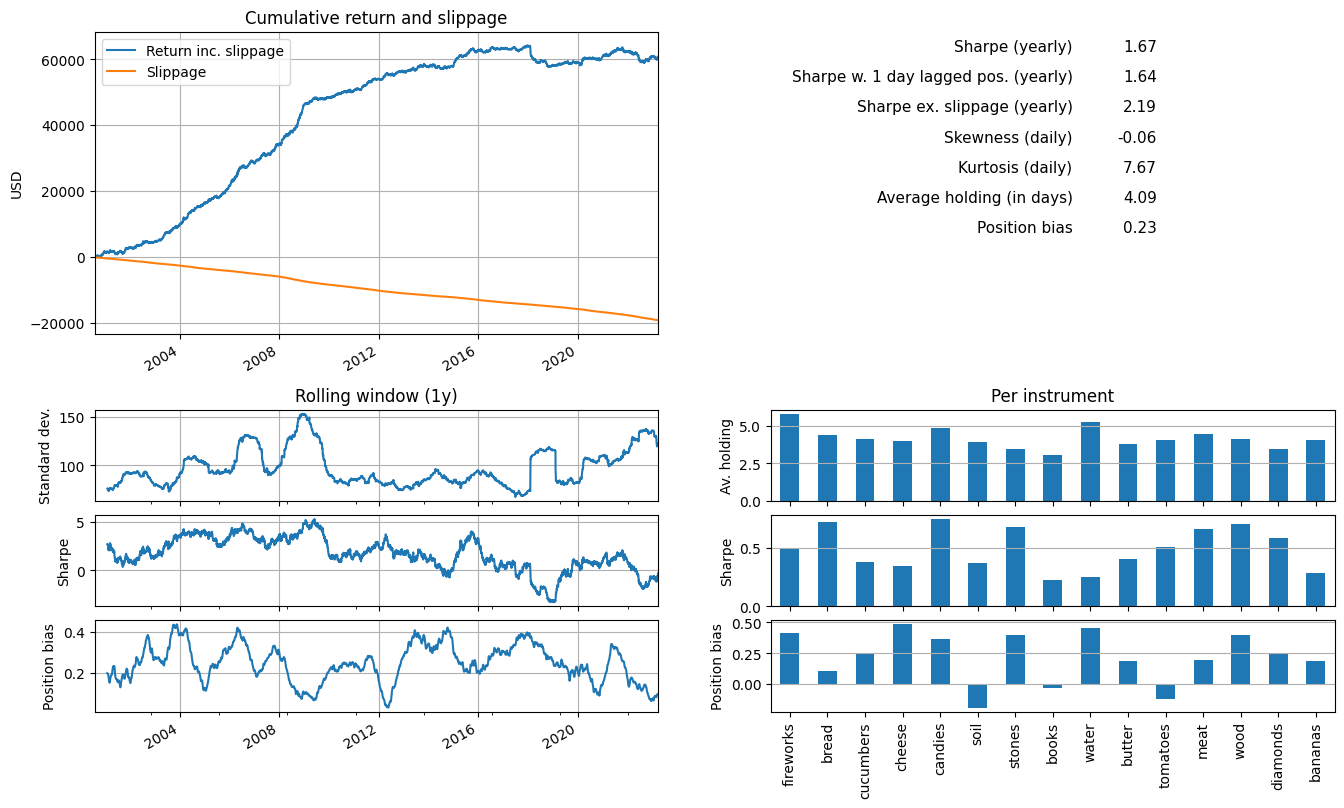

In [54]:
# Pure Linear return predictor + normal cov + sharpe optimizer every day; 
# with init at prev position + squared slippage*10

# cov_window_size=125; hist_window=150; future_window=10; vol_window=100; eval=True
experiment_name = '1930-eval-linear_return_predictor-naive-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

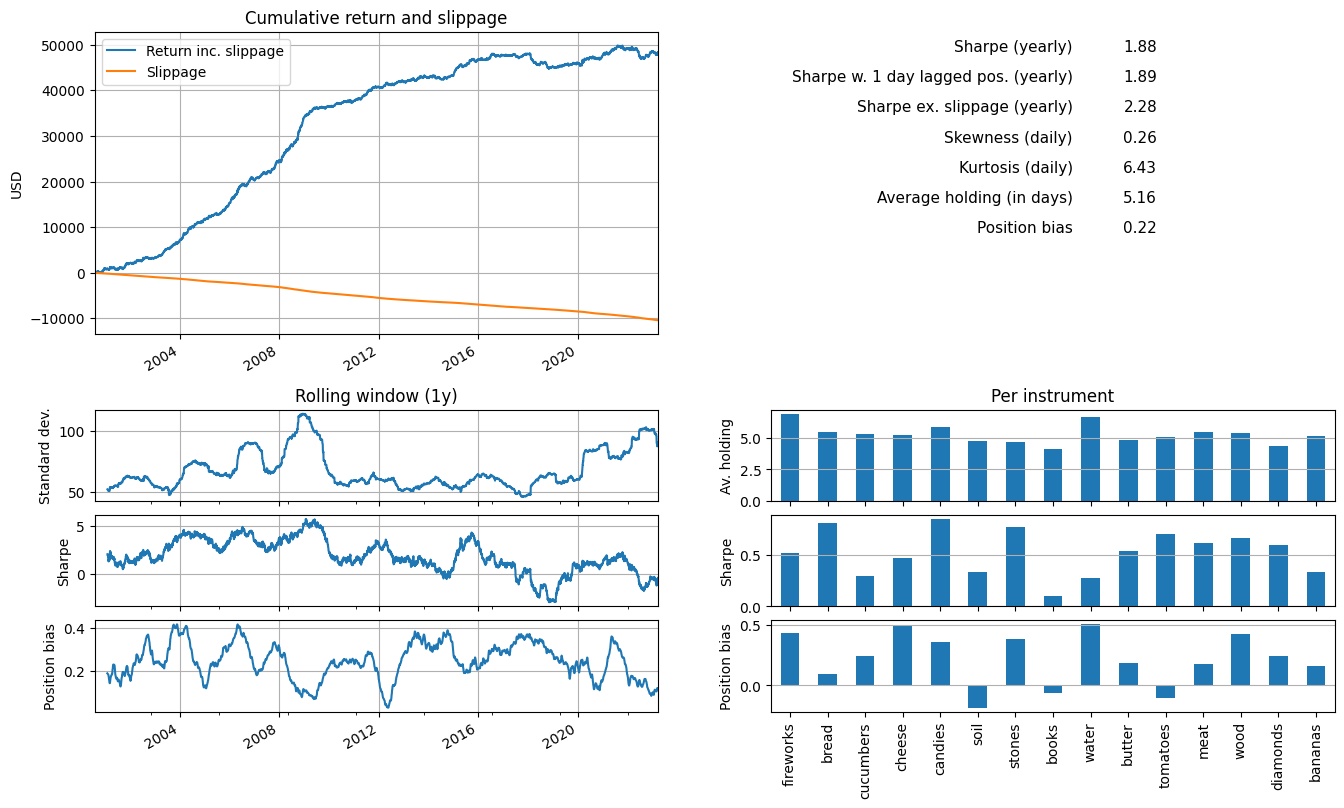

In [55]:
# Pure Linear return predictor + shrinkage cov of returns + sharpe optimizer every day; 
# with init at prev position + squared slippage*10 + skip update pos every 3rd day

# cov_window_size=125; hist_window=150; future_window=10; vol_window=100; eval=True
experiment_name = '2001-eval-linear_return_predictor-shrinkage-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

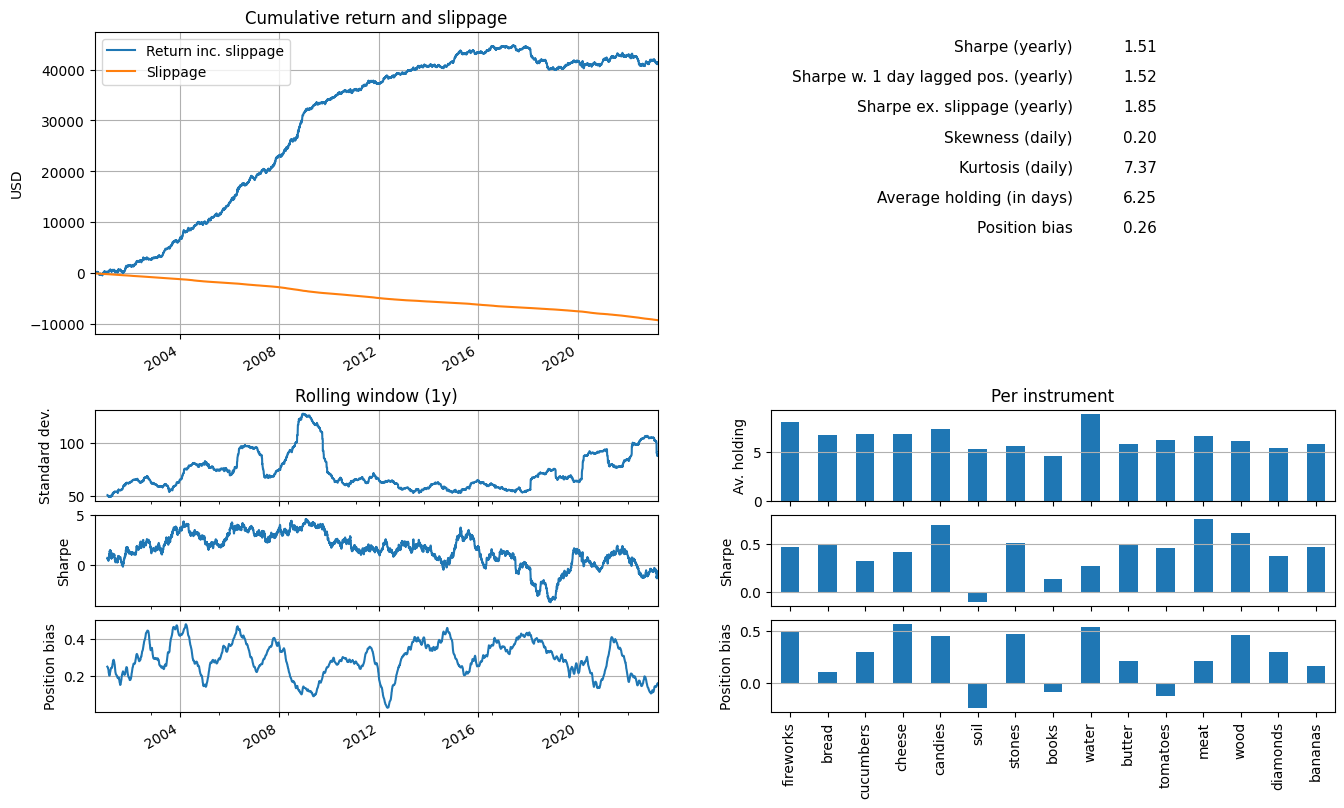

In [56]:
# Pure Linear return predictor + shrinkage cov of returns + sharpe optimizer every day; 
# with init at prev position + squared slippage*10 + skip update pos every 3rd day

# cov_window_size=125; hist_window=150; future_window=15 !!!; vol_window=100; eval=True
experiment_name = '2013-eval-linear_return_predictor-shrinkage-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

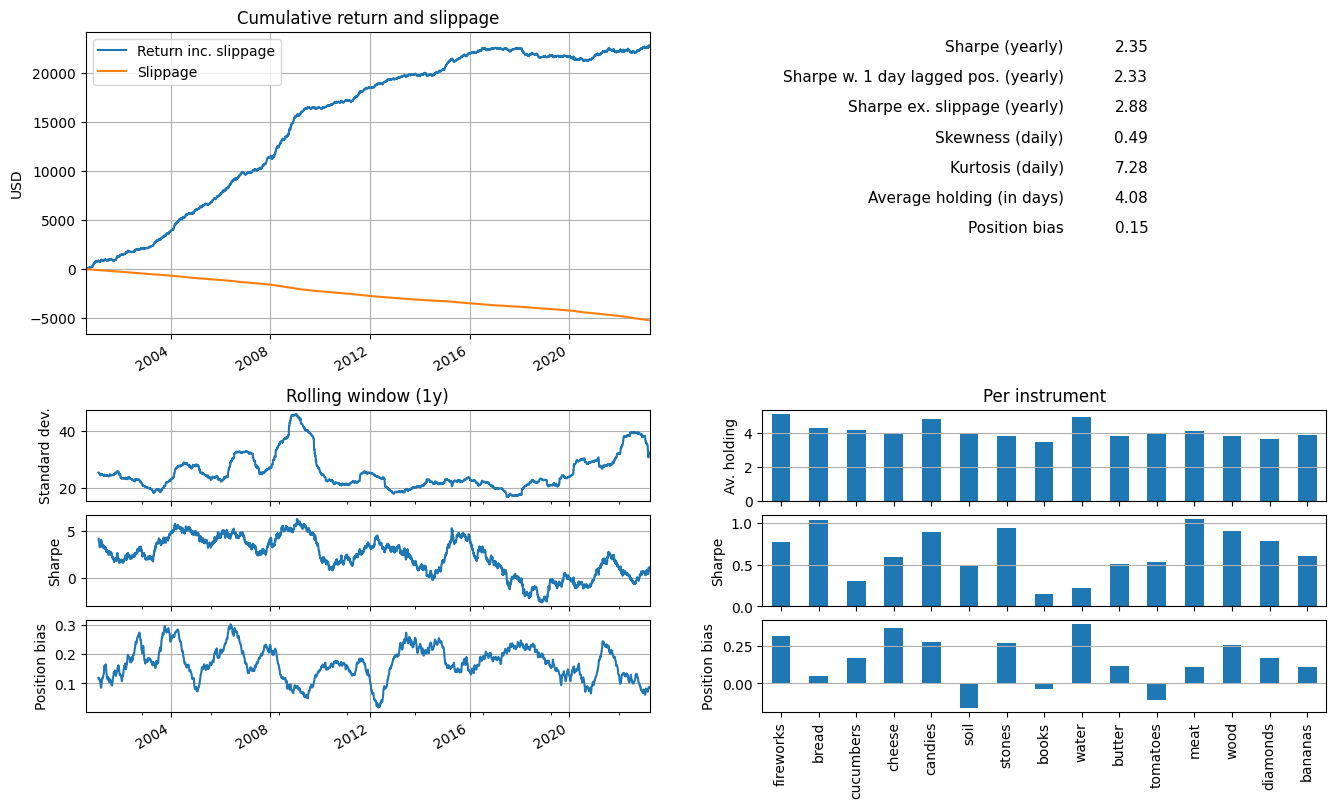

In [57]:
# Pure Linear return predictor + shrinkage cov of returns + sharpe optimizer every day; 
# with init at prev position + squared slippage*10 + skip update pos every 3rd day

# cov_window_size=125; hist_window=150; future_window=6 !!!; vol_window=100; eval=True
experiment_name = '2020-eval-linear_return_predictor-shrinkage-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

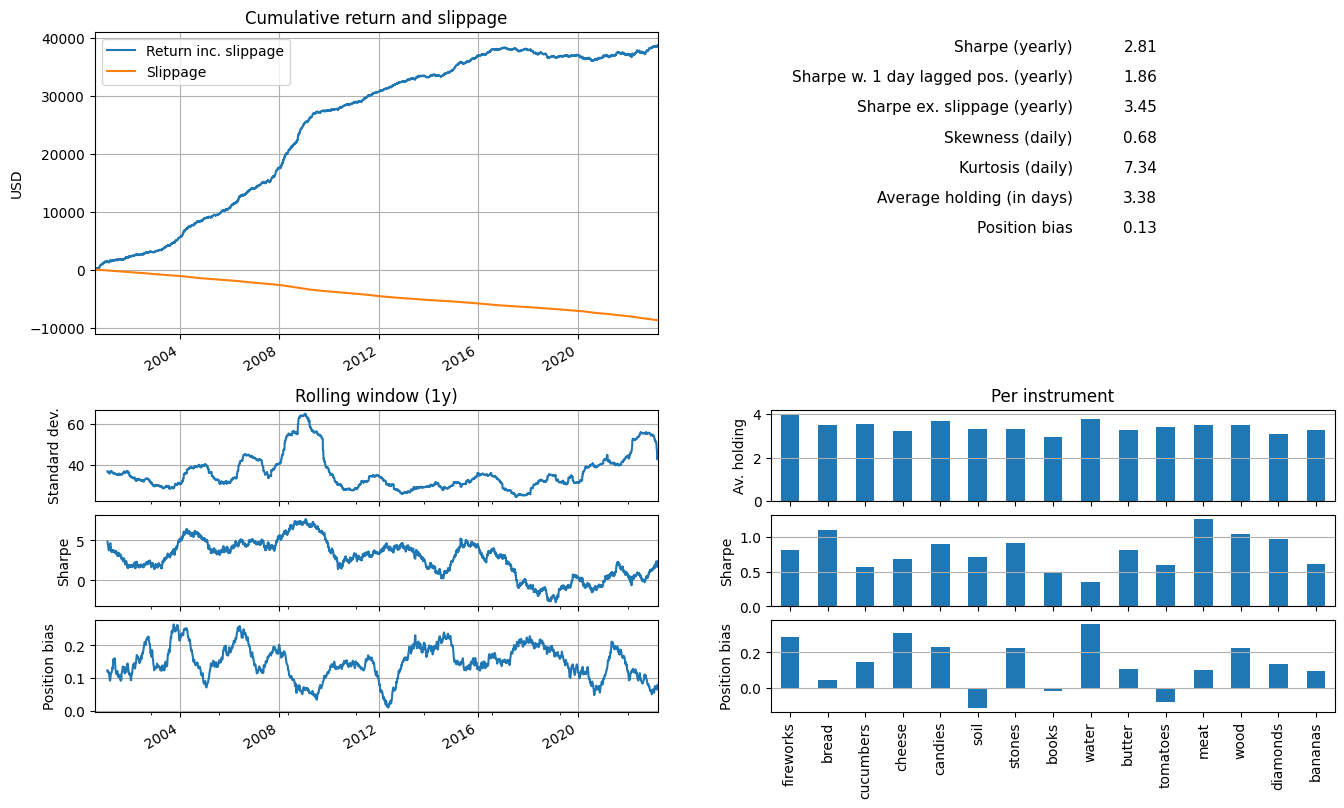

In [63]:
# Pure Linear return predictor + shrinkage cov of returns + sharpe optimizer every day; 
# with init at prev position + squared slippage*10 + skip update pos every 3rd day

# cov_window_size=125; hist_window=150; future_window=4 !!!; vol_window=100; eval=True
experiment_name = '2026-eval-linear_return_predictor-shrinkage-sharpe_optimizer'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

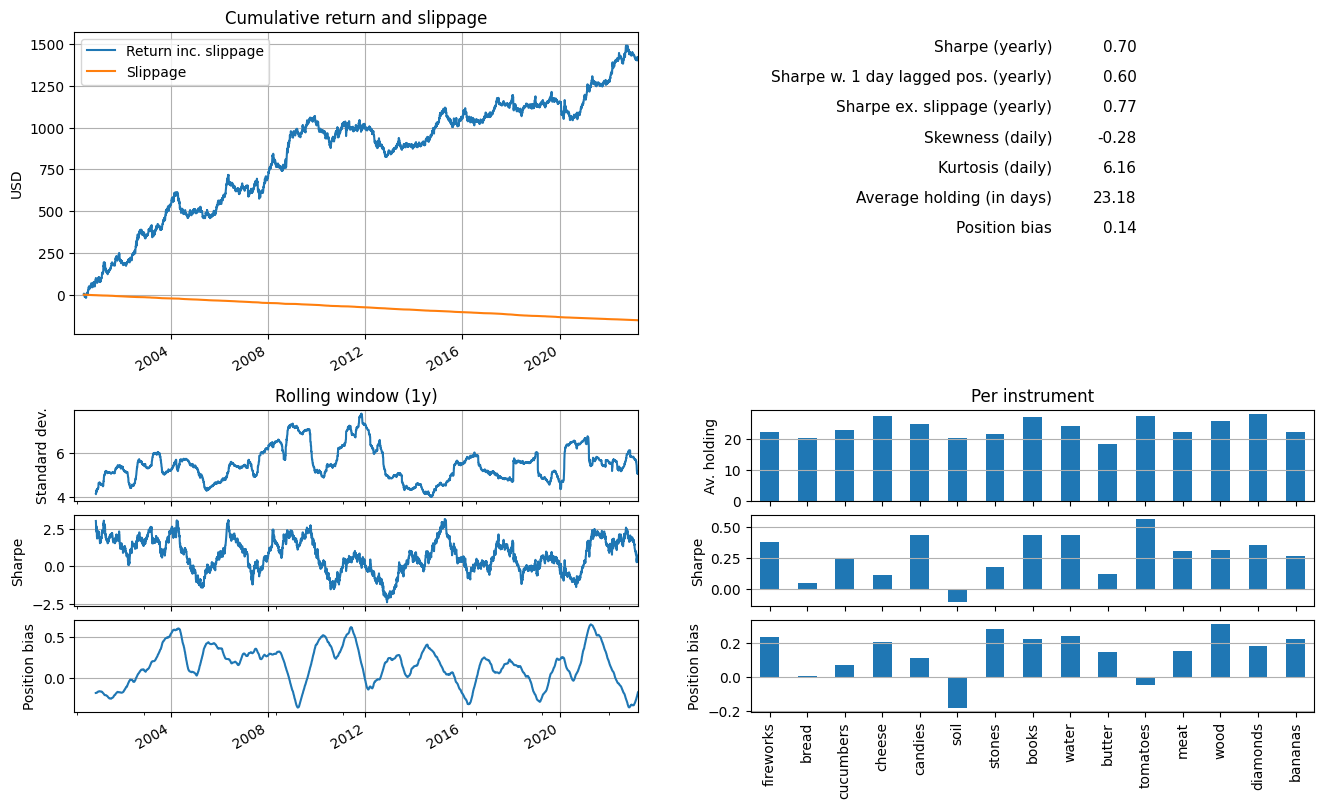

In [66]:
# THEIR BASELINE ON TEST SET

experiment_name = '2041-eval-lynx_baseline-no_op-no_op'
position = pd.read_csv(f'predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

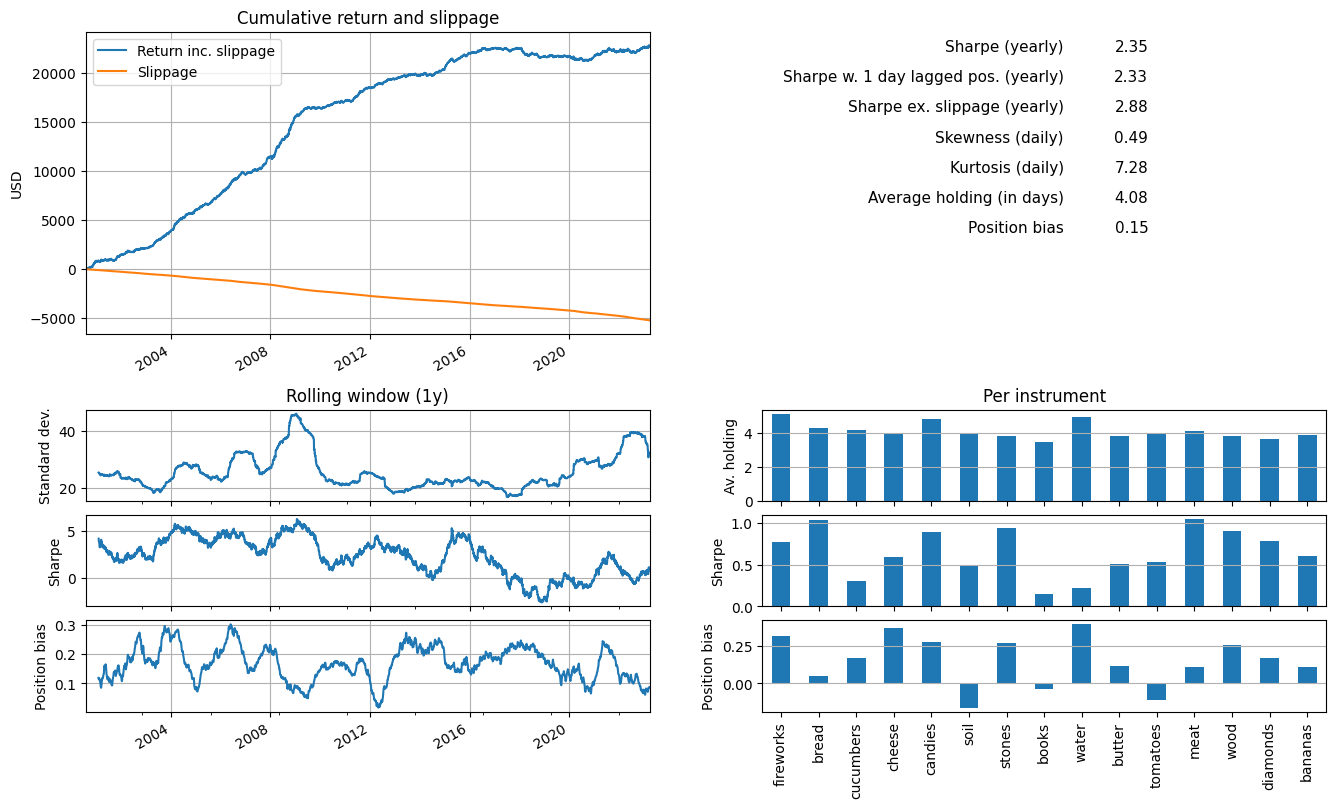

In [3]:
# Pure Linear return predictor + shrinkage cov of returns + sharpe optimizer every day; 
# with init at prev position + squared slippage*10 + skip update pos every 3rd day + CUMSUM returns as features (instead of returns)

# cov_window_size=125; hist_window=150; future_window=6 !!!; vol_window=100; eval=True
experiment_name = '2107-eval-linear_return_predictor-shrinkage-sharpe_optimizer'
position = pd.read_csv(f'../predictions_after/{experiment_name}/positions.csv', index_col='dates', parse_dates=['dates'])
evaluation.plot_key_figures(position, prices)

In [ ]:
# best 5.88
'hist_window': 250, 
'future_window': 3,
'vol_window': 100,

In [174]:
from tqdm import tqdm
import pypfopt
predicted_returns = []
for index in tqdm(range(50, prices.shape[0] - 1), total=prices.shape[0]):
    prices_until_incl_quote = prices.iloc[:index+1, :]

    # default span=500
    predicted_returns_at_trade = pypfopt.expected_returns.ema_historical_return(
        prices_until_incl_quote,
        span=50,
    ) * 252

    predicted_returns_at_trade_df = pd.DataFrame(
        predicted_returns_at_trade,
    ).T
    predicted_returns.append(predicted_returns_at_trade_df)

 99%|████████████████████████████████▌| 4088/4139 [00:23<00:00, 171.84it/s]


<Axes: >

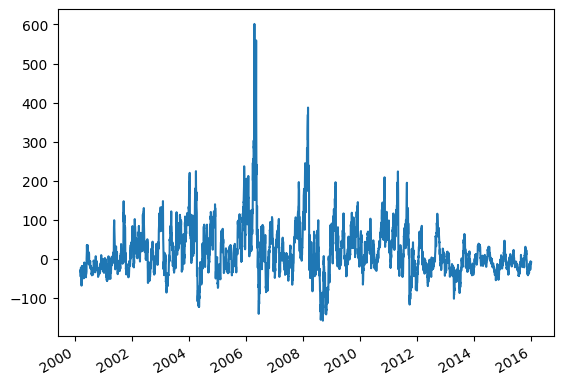

In [179]:
pd.concat(predicted_returns)['butter'].plot()

In [184]:
returns = prices.diff()

In [207]:
now = 10
X = returns[1:now]

In [211]:
f = X['fireworks'].to_numpy()

In [206]:
X.to_numpy().shape

(9, 15)

In [223]:
y = returns['fireworks'].iloc[now:now + 10].cumsum().to_numpy()[-1]

-2.4400000000000546

In [197]:
from sklearn.linear_model import LinearRegression

In [225]:
model = LinearRegression()
model.fit([f], [y])

LinearRegression()

In [235]:
returns['fireworks'].iloc[2:now+1].to_numpy()

array([-2.03,  1.02,  1.29, -1.21, -2.08, -0.42,  1.6 , -0.87, -0.18])

In [237]:
model.predict([returns['fireworks'].iloc[2:now+1].to_numpy()])

array([-2.44])

In [100]:
pd.read_csv('hackathon_prices_dev.csv', index_col='dates', parse_dates=['dates'])

,fireworks,bread,cucumbers,cheese,candies,soil,stones,books,water,butter,tomatoes,meat,wood,diamonds,bananas
dates,,,,,,,,,,,,,,,
2000-01-03,538.33,805.55,483.84,900.83,922.49,813.71,912.36,1120.67,896.38,312.37,666.15,816.62,601.01,609.16,705.00
2000-01-04,537.79,803.72,481.04,899.64,924.84,814.22,888.29,1097.34,899.97,308.02,661.03,816.37,597.24,610.99,702.57
2000-01-05,535.76,802.67,482.50,883.59,926.93,815.25,887.75,1078.77,895.40,305.77,661.64,817.59,595.80,597.53,698.47
2000-01-06,536.78,806.03,483.00,834.77,926.62,814.88,880.25,1075.56,898.12,305.27,657.47,815.06,594.77,589.44,697.79
2000-01-07,538.07,809.07,483.81,863.08,927.64,816.91,901.34,1091.78,900.64,305.64,657.24,817.01,598.71,592.04,694.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,920.39,812.80,778.62,1717.30,1254.30,755.67,1188.63,1102.61,1455.88,556.11,785.54,960.71,1050.01,719.06,858.54
2015-12-24,920.39,812.80,778.62,1717.11,1254.30,755.67,1188.63,1102.61,1455.88,556.11,785.54,958.74,1050.01,718.25,858.54
2015-12-28,920.23,814.56,778.62,1721.46,1252.12,754.76,1188.36,1099.49,1458.12,555.97,786.72,960.70,1053.66,717.13,857.74


In [124]:
predicted_prices.dropna()

,fireworks,bread,cucumbers,cheese,candies,soil,stones,books,water,butter,tomatoes,meat,wood,diamonds,bananas
dates,,,,,,,,,,,,,,,
2000-01-18,-0.342,0.253,0.178,-6.593,1.079,1.198,0.281,0.685,-0.209,-0.650,-0.817,0.815,-0.606,-0.602,1.036
2000-01-19,-0.420,0.315,0.643,-5.889,1.014,1.154,2.810,1.248,-0.872,-0.054,-0.345,0.720,-0.607,-0.836,1.586
2000-01-20,-0.160,0.192,0.873,-5.295,0.753,1.130,3.187,2.866,-0.267,0.211,-0.367,0.520,-0.248,-0.167,1.912
2000-01-21,-0.311,-0.228,0.294,-0.792,0.931,1.119,3.876,3.224,-0.678,0.387,0.388,1.108,-0.160,0.786,2.124
2000-01-24,-0.356,-0.375,0.405,-3.134,0.785,0.951,1.867,1.091,-0.904,0.360,0.441,0.955,-0.427,0.189,2.622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,-0.016,0.658,0.137,3.690,-0.089,-0.153,-0.749,-1.026,-0.059,0.152,-0.199,-0.292,-0.339,-0.234,-0.416
2015-12-24,-0.066,1.776,0.326,3.523,-0.147,-0.309,0.310,0.349,-0.410,-0.024,-0.583,0.072,-0.324,0.192,-0.233
2015-12-28,-0.008,1.373,0.318,3.407,-0.204,-0.463,0.037,0.513,-0.241,0.065,-0.508,-0.122,-0.515,0.309,-0.199


In [126]:
predicted_prices

,fireworks,bread,cucumbers,cheese,candies,soil,stones,books,water,butter,tomatoes,meat,wood,diamonds,bananas
dates,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-23,-0.016,0.658,0.137,3.690,-0.089,-0.153,-0.749,-1.026,-0.059,0.152,-0.199,-0.292,-0.339,-0.234,-0.416
2015-12-24,-0.066,1.776,0.326,3.523,-0.147,-0.309,0.310,0.349,-0.410,-0.024,-0.583,0.072,-0.324,0.192,-0.233
2015-12-28,-0.008,1.373,0.318,3.407,-0.204,-0.463,0.037,0.513,-0.241,0.065,-0.508,-0.122,-0.515,0.309,-0.199


In [127]:
import numpy as np 
covariance_matrix = np.identity(len(predicted_prices.columns))

In [135]:
predicted_returns.iloc[100, :]

NameError: name 'predicted_returns' is not defined

In [130]:
from pypfopt.efficient_frontier import EfficientFrontier
ef = EfficientFrontier(predicted_prices, cov_matrix=covariance_matrix)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

TypeError: expected_returns is not a series, list or array

In [122]:
for _ in prices.rolling(20):
    print(_)
    break

            fireworks   bread  cucumbers  cheese  candies    soil  stones  \
dates                                                                       
2000-01-03     538.33  805.55     483.84  900.83   922.49  813.71  912.36   

              books   water  butter  tomatoes    meat    wood  diamonds  \
dates                                                                     
2000-01-03  1120.67  896.38  312.37    666.15  816.62  601.01    609.16   

            bananas  
dates                
2000-01-03    705.0  
